In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_excel('data.xlsx')

In [49]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
df.drop(['id'], axis=1, inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [52]:
df.isna().sum().sum()

0

In [61]:
Y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

In [66]:
set(Y.to_list())

{0, 1}

In [55]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()

#X_scaled = ss.fit_transform(X)

#X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Model A (Greedy algirithm)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

naive_model = LogisticRegression()

def greedy_selection(model, n_features, f_metric):
  best_features = []
  features = X.columns.to_list()

  for i in range(n_features):
    scores = []
    for feature in features:
      model.fit(X[best_features + [feature]], Y)
      Y_pred = model.predict(X[best_features + [feature]])
      scores.append(f_metric(Y, Y_pred))

    curr_max_score = max(scores)
    curr_ind = scores.index(curr_max_score)
    best_features.append(features[curr_ind])

    print(f'The best {i+1} feature model is {best_features} with metric: {round(curr_max_score, 5)}')

    features.remove(features[curr_ind])

greedy_selection(naive_model, 3, accuracy_score)

The best 1 feature model is ['perimeter_worst'] with metric: 0.91916
The best 2 feature model is ['perimeter_worst', 'texture_worst'] with metric: 0.95079
The best 3 feature model is ['perimeter_worst', 'texture_worst', 'radius_mean'] with metric: 0.95606


# Model B

In [82]:
from sklearn.metrics import recall_score

greedy_selection(naive_model, 2, recall_score)

The best 1 feature model is ['perimeter_worst'] with metric: 0.86792
The best 2 feature model is ['perimeter_worst', 'texture_worst'] with metric: 0.91981


In [83]:
greedy_selection(naive_model, 5, recall_score)

The best 1 feature model is ['perimeter_worst'] with metric: 0.86792
The best 2 feature model is ['perimeter_worst', 'texture_worst'] with metric: 0.91981
The best 3 feature model is ['perimeter_worst', 'texture_worst', 'radius_mean'] with metric: 0.91981
The best 4 feature model is ['perimeter_worst', 'texture_worst', 'radius_mean', 'radius_worst'] with metric: 0.93396
The best 5 feature model is ['perimeter_worst', 'texture_worst', 'radius_mean', 'radius_worst', 'compactness_worst'] with metric: 0.9434


# Model C

In [92]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_leaf_nodes=3)

tree_model.fit(X, Y)
Y_pred = tree_model.predict(X)

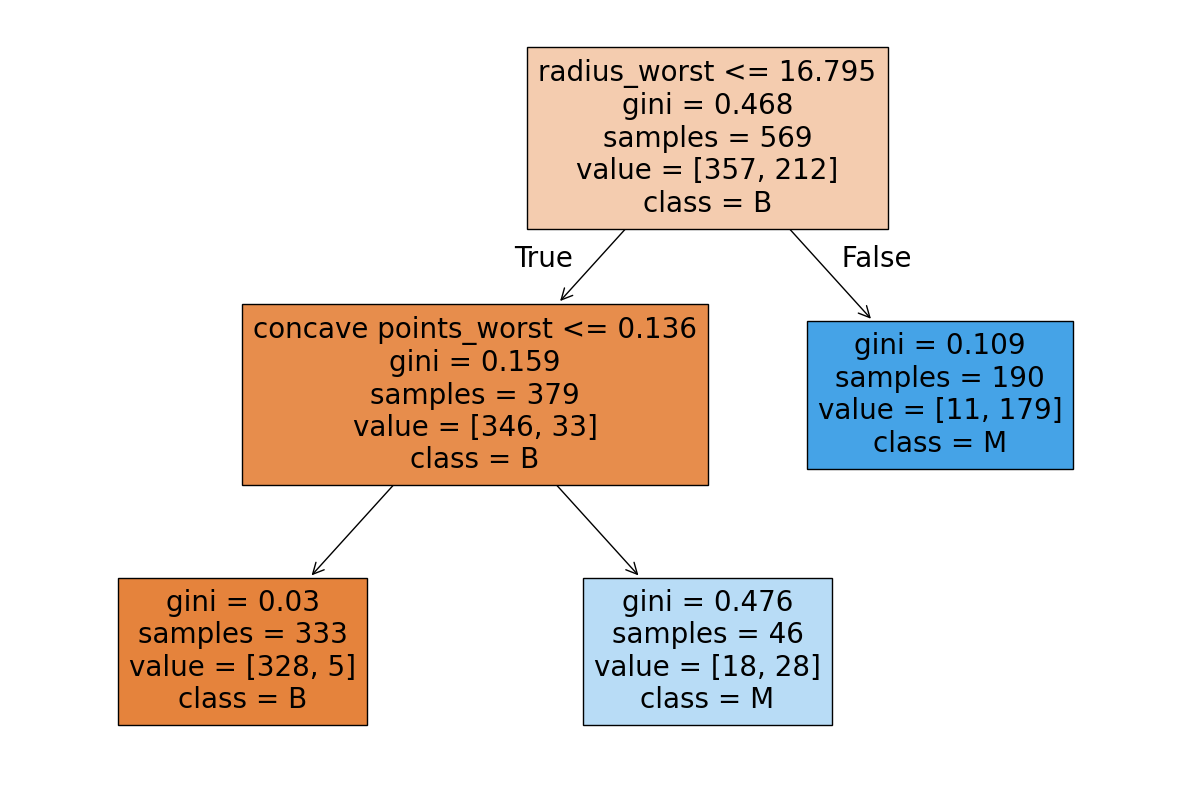

In [93]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_model,
                   feature_names=X.columns.to_list(),
                   class_names = ['B', 'M'],
                   filled = True)

In [94]:
accuracy_score(Y, Y_pred)

0.9402460456942003

# Model D

In [95]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(max_depth=3, n_estimators=10)
random_forest_model.fit(X, Y)
accuracy_score(Y, random_forest_model.predict(X))

0.9701230228471002

In [96]:
random_forest_model = RandomForestClassifier(max_depth=3, n_estimators=10)
random_forest_model.fit(X, Y)
accuracy_score(Y, random_forest_model.predict(X))

0.968365553602812

In [97]:
random_forest_model = RandomForestClassifier(max_depth=3, n_estimators=10)
random_forest_model.fit(X, Y)
accuracy_score(Y, random_forest_model.predict(X))

0.9701230228471002

In [98]:
random_forest_model = RandomForestClassifier(max_depth=3, n_estimators=10)
random_forest_model.fit(X, Y)
accuracy_score(Y, random_forest_model.predict(X))

0.9789103690685413

In [99]:
random_forest_model = RandomForestClassifier(max_depth=3, n_estimators=10)
random_forest_model.fit(X, Y)
accuracy_score(Y, random_forest_model.predict(X))

0.9666080843585237